<a href="https://colab.research.google.com/github/TolaniSilas/Diabetic-Retinopathy-Project/blob/main/diabetic-retino-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# Mount Google Drive at the specified directory path.
drive.mount("/content/drive")

Mounted at /content/drive


# Install the necessary libraries for this project.

In [ ]:
! pip install tensorflow

# Import Libraries
Import the necessary libraries for this project.

In [ ]:
# Import the necessary libraries.
import os
import numpy as np
from matplotlib import pyplot as plt, image as mpimg
%matplotlib inline
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report




print('All libraries are imported and ready to use!')

All libraries are imported and ready to use!


In [ ]:
# Check tensorflow and keras version.
! pip show tensorflow
print()

! pip show keras
print()

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(66)

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow



# Explore the Image data.

There are 2 classes of images to be classify, which are: the presence of diabetic retinopathy [No_DR] and the absence of diabetic retinopathy [DR]



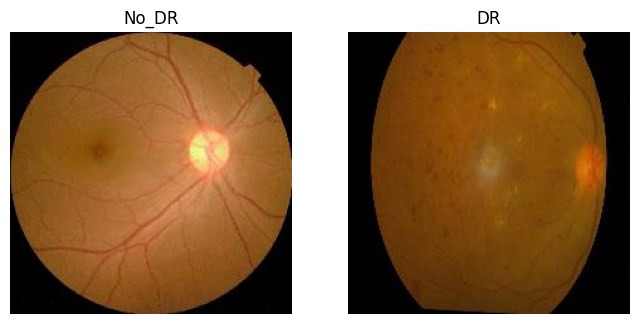

In [ ]:
# The images are located in the data path.
train_data_path = "/content/drive/MyDrive/Datasets/diabetic_retinopathy_dataset/train"

# Get the classes of images to be classified.
classes = os.listdir(train_data_path)
print(f"There are {len(classes)} classes of images to be classify, which are: the presence of diabetic retinopathy [{classes[0]}]" +
      f" and the absence of diabetic retinopathy [{classes[1]}]\n")


# Display the classes of images to be classified.
fig = plt.figure(figsize=(8, 10))

# Initialize the subplot index.
i = 0

for sub_directory in os.listdir(train_data_path):
    i += 1

    # Get the file path of the first image in each directory.
    image_path = os.listdir(os.path.join(train_data_path, sub_directory))[0]
    image_file = os.path.join(train_data_path, sub_directory, image_path)

    # Read the image file using matplotlib image module.
    image = mpimg.imread(image_file)

    # Add a subplot for each class and display the image.
    ax= fig.add_subplot(1, len(classes), i)
    ax.axis("off")
    ax.set_title(f"{sub_directory}")

    plt.imshow(image)

In [ ]:
# Check the dimensions of the image.
for sub_directory in os.listdir(train_data_path):
    i += 1

    # Get the file path of the first image in each directory.
    image_path = os.listdir(os.path.join(train_data_path, sub_directory))[0]
    image_file = os.path.join(train_data_path, sub_directory, image_path)

    # Open the image file using PIL.
    image = Image.open(image_file)

    # Get the width and height of the image.
    width = image.width
    height = image.height

    # Print the width and height of the image.
    print(f"The width and height of the {sub_directory} image are {width} and {height} pixels respectively.")

The width and height of the No_DR image are 224 and 224 pixels respectively.
The width and height of the DR image are 224 and 224 pixels respectively.


# Load the image data.
Load the image data for training of models, validating and evaluation of models.

In [ ]:

# Get the validation directory.
val_data_path = "/content/drive/MyDrive/Datasets/diabetic_retinopathy_dataset/valid"

print("Getting Data...")

# ImageDataGenerator for training data with data augmentation.
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True
)

print("Preparing Training Dataset...")

# Define batxch size.
batch_size = 50

# Flow training images in batches using train_datagen.
train_generator = train_datagen.flow_from_directory(
    directory=train_data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    seed=66
)



# ImageDataGenerator for validation data (no augmentation).
val_datagen = ImageDataGenerator(
    rescale = 1./255
)

print("Preparing Validation Dataset...")

# Flow validation images in batches using val_datagen.
val_generator = val_datagen.flow_from_directory(
    directory=val_data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
    seed=64
)

classnames = list(train_generator.class_indices.keys())
print(classnames)
print('Data generators ready')


Getting Data...
Preparing Training Dataset...
Found 2076 images belonging to 2 classes.
Preparing Validation Dataset...
Found 531 images belonging to 2 classes.
['DR', 'No_DR']
Data generators ready


Since the training dataset has been loaded, it will be used to train the Convolutional Neural Network (CNN) model. The loaded validation dataset will be used to monitor the performance of the trained CNN model during the training process. The loaded testing dataset is used to evaluate the final performance of the trained CNN model.

# Define the CNN architecture and the layers in the Network.

In [ ]:

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=train_generator.image_shape, activation='relu'))

# 2nd Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
# 1st Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# 2nd Pooling  Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1st Dropout Layer
model.add(Dropout(0.30))

# 5th convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# 3rd Pooling  Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Dropout Layer
model.add(Dropout(0.2))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layer
model.add(Dense(8, activation='relu'))

# 3rd Dropout Layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid', name='preds'))


# show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                   

# Training the model.
Since the CNN architecture has been defined, we can now use the image data to train the network.

In [ ]:
# Compile the model.
model.compile(
    # Set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # Set the optimizer as Adam with a learning rate of 0.001
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    # Set the metrics as accuracy
    metrics=['accuracy']
)


# Train the model over 15 epochs.
num_epochs = 15

history = model.fit(
    train_generator,
    steps_per_epoch = 42, #.samples // batch_size,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size,
    epochs = num_epochs,
    verbose=1
)

Epoch 1/15
42/42 [==============================] - 1628s 39s/step - loss: 0.6842 - accuracy: 0.5434 - val_loss: 0.6443 - val_accuracy: 0.8500
Epoch 2/15
42/42 [==============================] - 691s 16s/step - loss: 0.5781 - accuracy: 0.6912 - val_loss: 0.4526 - val_accuracy: 0.8880
Epoch 3/15
42/42 [==============================] - 657s 16s/step - loss: 0.4848 - accuracy: 0.7659 - val_loss: 0.3650 - val_accuracy: 0.8840
Epoch 4/15
42/42 [==============================] - 649s 15s/step - loss: 0.4339 - accuracy: 0.7934 - val_loss: 0.3178 - val_accuracy: 0.8920
Epoch 5/15
42/42 [==============================] - 647s 15s/step - loss: 0.4310 - accuracy: 0.8044 - val_loss: 0.2710 - val_accuracy: 0.8980
Epoch 6/15
42/42 [==============================] - 691s 16s/step - loss: 0.4015 - accuracy: 0.8054 - val_loss: 0.2804 - val_accuracy: 0.8940
Epoch 7/15
42/42 [==============================] - 697s 17s/step - loss: 0.3666 - accuracy: 0.8059 - val_loss: 0.2419 - val_accuracy: 0.8860
Epoch

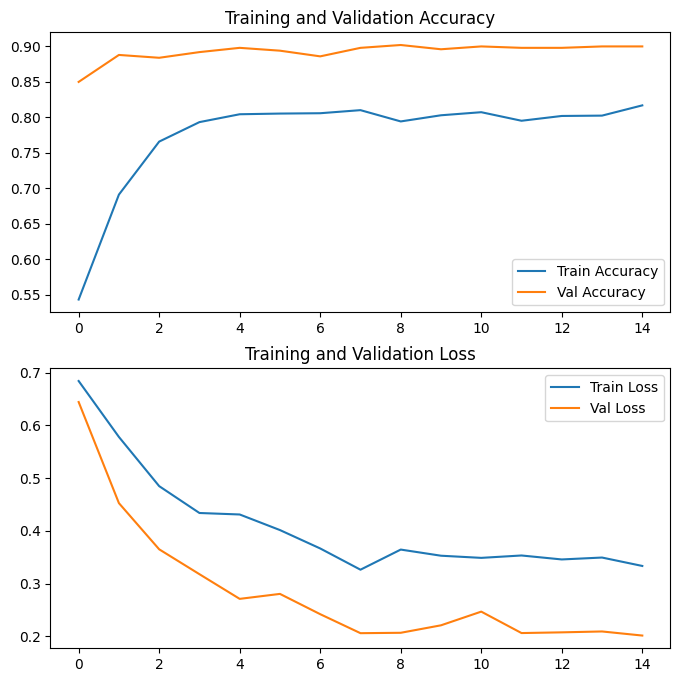

In [ ]:
# Get the training and validation accuracy.
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

# Get the training and validation loss.
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]


# Plot the learning curve.
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(range(num_epochs), training_accuracy)
ax[0].plot(range(num_epochs), validation_accuracy)
ax[0].set_title("Training and Validation Accuracy")
ax[0].legend(["Train Accuracy", "Val Accuracy"], loc="lower right")

ax[1].plot(range(num_epochs), training_loss)
ax[1].plot(range(num_epochs), validation_loss)
ax[1].set_title("Training and Validation Loss")
ax[1].legend(["Train Loss", "Val Loss"], loc="upper right")

plt.show()

In [ ]:
# Get test data directory.
test_data_path = "/content/drive/MyDrive/Datasets/diabetic_retinopathy_dataset/test"

# ImageDataGenerator for validation data (no augmentation).
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

print("Preparing Test Dataset...")

# Flow validation images in batches using val_datagen.
test_generator = val_datagen.flow_from_directory(
    directory=test_data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
)

print('Test Data generators ready')

Preparing Test Dataset...
Found 231 images belonging to 2 classes.
Test Data generators ready


In [ ]:
# Make predictions on the data loaded using ImageDataGenerator
probability_prediction = model.predict(test_generator)

# Round up probabilities
prediction = np.round(probability_prediction)

# # Print the rounded predictions
# print(prediction)

labels = np.concatenate([test_generator[i][1] for i in range(len(test_generator))])

conf_matrix = confusion_matrix(labels, prediction)

class_rep = classification_report(labels, prediction)


# Assuming conf_matrix is your confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Compute accuracy
accuracy = accuracy_score(labels, prediction)

# Compute precision
precision = precision_score(labels, prediction)

# Compute recall
recall = recall_score(labels, prediction)

# Compute F1-score
f1score = f1_score(labels, prediction)

# Print the metrics
print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-score:", round(f1score, 4))

print(class_rep)


5/5 [==============================] - 19s 4s/step
Accuracy: 0.8874
Precision: 0.951
Recall: 0.822
F1-score: 0.8818
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89       113
         1.0       0.95      0.82      0.88       118

    accuracy                           0.89       231
   macro avg       0.89      0.89      0.89       231
weighted avg       0.90      0.89      0.89       231



In [ ]:
model_filename = "/content/drive/MyDrive/Datasets/diabetic_retinopathy_dataset/diabetic-retino-model.h5"
model.save(model_filename)

print(f"Model saved as {model_filename}")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as /content/drive/MyDrive/Datasets/diabetic_retinopathy_dataset/diabetic-retino-model.h5


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from PIL import Image


# Function to load and preprocess the image
def load_image(image_path):

    # Define the image width and height.
    # IMAGE_HEIGHT, IMAGE_WIDTH = (224, 224)

    # Load the image
    image = Image.open(image_path)
    img = image.resize((224, 224))
    # image = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))

    # Convert the image to an array and rescale pixel values to [0, 1]
    # image_array = tf.keras.preprocessing.image.img_to_array(image) / 255.0
    img_array = np.array(img)

    # Normalize the image array.
    img_array = img_array / 255.0

    # Add a batch dimension
    image_tensor = np.expand_dims(img_array, axis=0)

    return image_tensor


def predict_image(model, image_path):


    # Load and preprocess the image
    image_tensor = load_image(image_path)

    # Predict the class probabilities
    probability_prediction = model.predict(image_tensor)

    return probability_prediction






# The images are located in the data path.
train_data_path = "/content/drive/MyDrive/Datasets/diabetic_retinopathy_dataset/train"

# Get the classes of images to be classified.
classes = os.listdir(train_data_path)
print(f"There are {len(classes)} classes of images to be classify, which are: the presence of diabetic retinopathy [{classes[0]}]" +
      f" and the absence of diabetic retinopathy [{classes[1]}]\n")


# Initialize the subplot index.
i = 0
out = []
for sub_directory in os.listdir(train_data_path):
    i += 1

    if i == 1:
        # Get the file path of the first image in each directory.
        image_path = os.listdir(os.path.join(train_data_path, sub_directory))[1]
        image_file = os.path.join(train_data_path, sub_directory, image_path)


        model = load_model("/content/drive/MyDrive/Datasets/diabetic_retinopathy_dataset/diabetic-retino-model.h5")


        probs = predict_image(model, image_file)
        out.append(probs[0, 0])
print(round(out[0], 4))

There are 2 classes of images to be classify, which are: the presence of diabetic retinopathy [No_DR] and the absence of diabetic retinopathy [DR]

1/1 [==============================] - 0s 165ms/step
0.9667


In [ ]:
model = load_model("/content/drive/MyDrive/Datasets/diabetic_retinopathy_dataset/diabetic-retino-model.h5")


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Step 3: Save the TensorFlow Lite model to a file
tflite_model_file = '/content/drive/MyDrive/Datasets/diabetic_retinopathy_dataset/model.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

print(f"Model successfully converted to TensorFlow Lite and saved as {tflite_model_file}")

Model successfully converted to TensorFlow Lite and saved as /content/drive/MyDrive/Datasets/diabetic_retinopathy_dataset/model.tflite


In [ ]:
import numpy as np

arr = np.array([[1.12345]])
rounded_arr = np.round(arr, decimals=2)

print(rounded_arr)


[[1.12]]
